# The scipy.stats Python Library 

[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/stats.html)
***

#### 10% A clear and concise overview of the scipy.stats Python library:

### Scipy
### Scipy.stats
### Descriptive Statistics & Probability Distributions
https://scipy-lectures.org/packages/statistics/index.html

https://docs.scipy.org/doc/scipy/reference/reference/stats.html

[t-test v anova](https://www.raybiotech.com/learning-center/t-test-anova/#:~:text=The%20t%2Dtest%20is%20a,statistically%20different%20from%20each%20other)

- What is ANOVA
- Why is it used
- When is it used
- What are is its limitations



### Hypothesis Testing

Hypothesis testing types:

1. T Test ( Student T test)
2. Z Test
3. ANOVA Test
4. Chi-Square Test

### T-test

### ANOVA Test - Analysis of variance

https://www.edureka.co/blog/introduction-to-analysis-of-variance-with-ranova/

<img src="images/variances.png" alt="Compare Variances">


Analysis of variance (ANOVA) was developed by the statistician Ronald Fisher  in 1918, it is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

Like the t-test, ANOVA determines whether the differences between groups of data are statistically significant. It works by analysing the levels of variance within the groups through samples taken from each of them. [3](#References)

T-tests & ANOVA will provide the same results where only two samples are under consideration, however t-test would not be as reliable as an ANOVA test in cases where there are more than 2 samples. 

#### Types of ANOVA Test

1. One-Way ANOVA

2. Two-Way ANOVA

3. N-Way ANOVA (MANOVA)





One-way Anova and Two-Way Anova

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

#### Assumption 1

Assumption #1: Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous). Examples of variables that meet this criterion include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth. You can learn more about interval and ratio variables in our article: Types of Variable.

#### Assumption 2

Assumption #2: Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups, but it can be used for just two groups (but an independent-samples t-test is more commonly used for two groups). Example independent variables that meet this criterion include ethnicity (e.g., 3 groups: Caucasian, African American and Hispanic), physical activity level (e.g., 4 groups: sedentary, low, moderate and high), profession (e.g., 5 groups: surgeon, doctor, nurse, dentist, therapist), and so forth.

#### Assumption 3

Assumption #3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the one-way ANOVA. If your study fails this assumption, you will need to use another statistical test instead of the one-way ANOVA (e.g., a repeated measures design). If you are unsure whether your study meets this assumption, you can use our Statistical Test Selector, which is part of our enhanced guides.

#### Assumption 4

Assumption #4: There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual pattern (e.g., in a study of 100 students' IQ scores, where the mean score was 108 with only a small variation between students, one student had a score of 156, which is very unusual, and may even put her in the top 1% of IQ scores globally). The problem with outliers is that they can have a negative effect on the one-way ANOVA, reducing the validity of your results. Fortunately, when using SPSS Statistics to run a one-way ANOVA on your data, you can easily detect possible outliers. In our enhanced one-way ANOVA guide, we: (a) show you how to detect outliers using SPSS Statistics; and (b) discuss some of the options you have in order to deal with outliers. You can learn more about our enhanced one-way ANOVA guide on our Features: One-way ANOVA page.

#### Assumption 5

Assumption #5: Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results. You can test for normality using the Shapiro-Wilk test of normality, which is easily tested for using SPSS Statistics. In addition to showing you how to do this in our enhanced one-way ANOVA guide, we also explain what you can do if your data fails this assumption (i.e., if it fails it more than a little bit). Again, you can learn more on our Features: One-way ANOVA page.

 The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

#### Assumption 6

Assumption #6: There needs to be homogeneity of variances. You can test this assumption in SPSS Statistics using Levene's test for homogeneity of variances. If your data fails this assumption, you will need to not only carry out a Welch ANOVA instead of a one-way ANOVA, which you can do using SPSS Statistics, but also use a different post hoc test. In our enhanced one-way ANOVA guide, we (a) show you how to perform Levene’s test for homogeneity of variances in SPSS Statistics, (b) explain some of the things you will need to consider when interpreting your data, and (c) present possible ways to continue with your analysis if your data fails to meet this assumption, including running a Welch ANOVA in SPSS Statistics instead of a one-way ANOVA, and a Games-Howell test instead of a Tukey post hoc test (learn more on our Features: One-way ANOVA page).

#### 20% An example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats

#### 10% Appropriate plots and other visualisations to enhance your notebook for viewers


## Application
***

### Import necessary packages

In [70]:
import pandas as pd  # Pandas for dataframe.

import seaborn as sns # Seaborn for Plotting.

import scipy.stats as ss # SciPy Stats

import numpy as np # Numpy for arrays 

import collections as co # Collections

import scipy.special as spec # SciPy Specials

import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Selection of Dataset

Consider a diet dataset. 
https://www.sheffield.ac.uk/mash/statistics/datasets

<img src="images/diet.jpg" alt="Diet">


In [71]:
# Load the iris data set from a URL.
df = pd.read_csv("datasets/diet.csv")

In [72]:
# Have a look at the data.
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
71,74,1,35,183,83,3,80.2
72,75,1,49,177,84,3,79.9
73,76,1,28,164,85,3,79.7
74,77,1,40,167,87,3,77.8


In [73]:
# Have a look at the data.
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


In [74]:
# Summary statistics.
df.describe()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,39.868421,0.434211,39.223684,170.776316,72.289474,2.039474,68.343421
std,22.843434,0.498946,9.908379,11.419981,7.974653,0.823663,8.058938
min,1.000000,0.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,19.750000,0.000000,32.500000,163.750000,66.000000,1.000000,61.950000
50%,40.500000,0.000000,39.000000,169.000000,72.000000,2.000000,68.950000
75%,59.250000,1.000000,47.250000,175.250000,78.000000,3.000000,73.675000
max,78.000000,1.000000,60.000000,201.000000,88.000000,3.000000,84.500000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        76 non-null     int64  
 1   gender        76 non-null     int64  
 2   Age           76 non-null     int64  
 3   Height        76 non-null     int64  
 4   pre.weight    76 non-null     int64  
 5   Diet          76 non-null     int64  
 6   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 4.3 KB


In [76]:
X_diet = df.drop('Person', axis=1)
X_diet.shape

(76, 6)

In [77]:
y_diet = df['Person']
y_diet.shape

(76,)

In [91]:
df['weightDiff'] = df['pre.weight'] - df['weight6weeks']

### Visualise

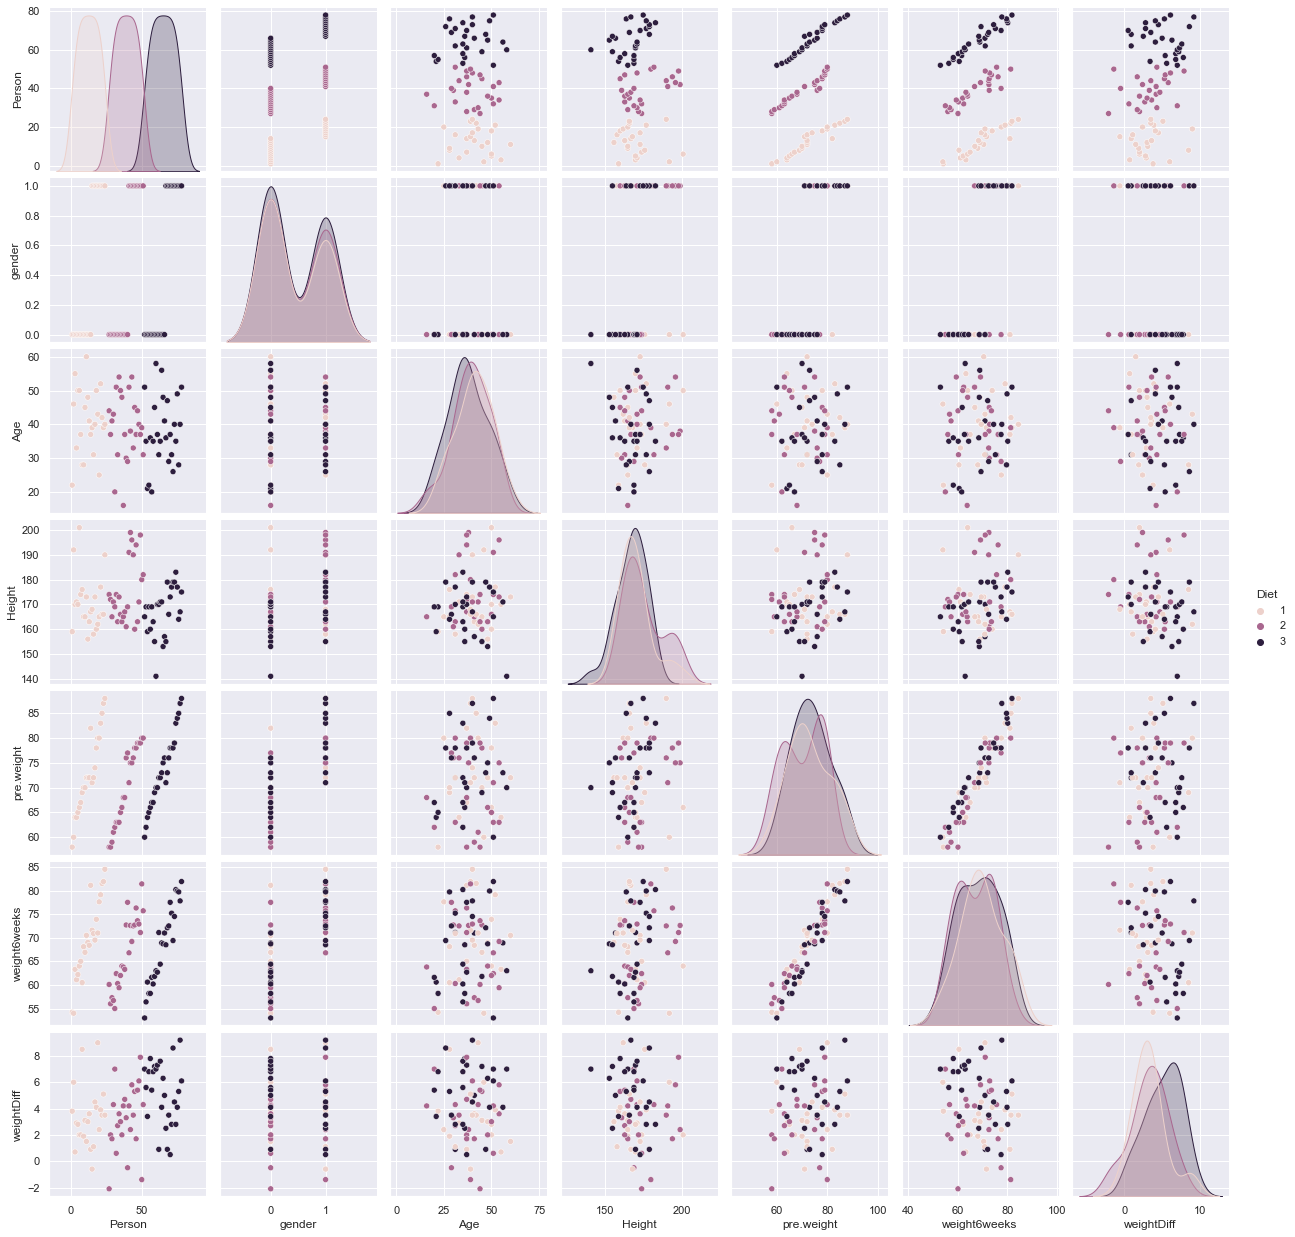

In [92]:
sns.pairplot(df, hue="Diet")
plt.show()

## Check ANOVA Assumptions
***


https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

### Assumption 1: Dependent variable

In [93]:
# The dependent variable.
dependent = df['weightDiff']
dependent

0     3.8
1     6.0
2     0.7
3     2.9
4     2.8
     ... 
71    2.8
72    4.1
73    5.3
74    9.2
75    6.1
Name: weightDiff, Length: 76, dtype: float64

In [82]:
dependent.describe()

count    76.000000
mean     -3.946053
std       2.505803
min      -9.200000
25%      -5.650000
50%      -3.700000
75%      -2.300000
max       2.100000
dtype: float64

### Assumption 2: Independent variable

In [94]:
# Independent variable.
independent = df['Diet']
independent

0     1
1     1
2     1
3     1
4     1
     ..
71    3
72    3
73    3
74    3
75    3
Name: Diet, Length: 76, dtype: int64

### Assumption 3: Independence of Observations

https://inspect-lb.org/statistical-tests/

There are 76 individual persons tested of varying age, weight and gender. 

### Assumption 4: Outliers

<AxesSubplot:xlabel='Diet', ylabel='weightDiff'>

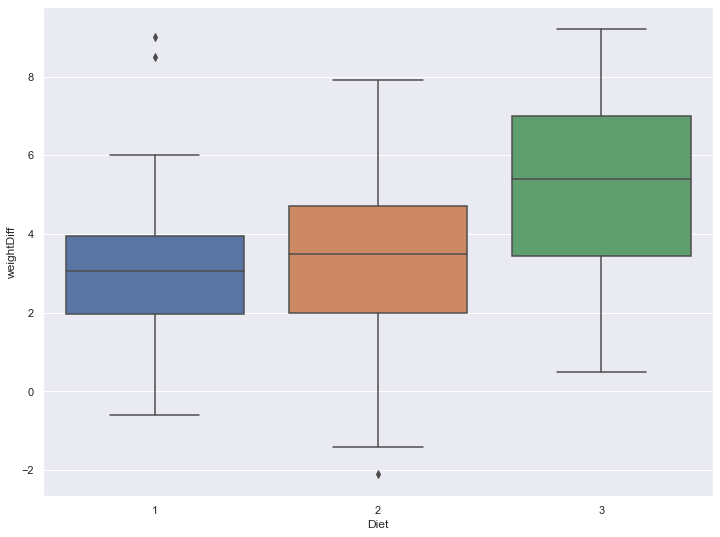

In [117]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent)

In [125]:
df.loc[(df['weightDiff']>=8) & (df['Diet']< 2)]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightDiff
7,8,0,28,176,69,1,60.5,8.5
47,19,1,43,162,80,1,71.0,9.0


In [128]:
df.loc[(df['weightDiff']<=-2) & (df['Diet']<3)]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightDiff
14,27,0,44,174,58,2,60.1,-2.1


### Assumption 5: Normality

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php


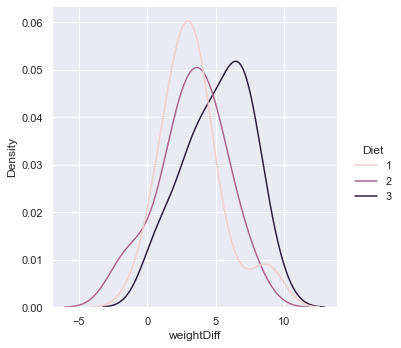

In [129]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

We can see from the above plot that each of the plots are approximately normally distributed. The Type 2 diet seems to have the most conventional normal distribution. The Type 1 and Type 3 diet seem to have a couple of kinks in the distribution but these are not too severe for us to conclude that they are not normally distributed.

**Apply Shapiro Wilk Test**
The Shapiro Wilk test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

In [131]:
# Shapiro Wilk Test - Diet Type 1

ss.shapiro(df['weightDiff'][df['Diet'] == 1]) 

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [132]:
# Shapiro Wilk Test - Diet Type 2

ss.shapiro(df['weightDiff'][df['Diet'] == 2]) 

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [133]:
# Shapiro Wilk Test - Diet Type 3

ss.shapiro(df['weightDiff'][df['Diet'] == 3]) 

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

In [ ]:
scipy.stats.shapiro¶

In [86]:
# Extract the setosa sepal lengths.
sepal_len_setosa = dependent[independent == 'setosa']
sepal_len_setosa

Series([], dtype: float64)

In [87]:
# Run the Shapiro-Wilk test.
ss.shapiro(sepal_len_setosa)

ValueError: Data must be at least length 3.

In [ ]:
# Run the test for the versicolors.
ss.shapiro(dependent[independent == 'versicolor'])

In [ ]:
# Run the test for the virginica.
ss.shapiro(dependent[independent == 'virginica'])

<br>

#### Assumption 6: Homogeneity of Variances

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

***

In [ ]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'setosa'],
    dependent[independent == 'versicolor'],
    dependent[independent == 'virginica']
)

## One-Way ANOVA 
***

In [97]:
# Splitting into DataFrames for each of the diets.
diet1 = df[df['Diet'] == 1]
diet2 = df[df['Diet'] == 2]
diet3 = df[df['Diet'] == 3]

### Results - perform and display the results of your ANOVA using scipy.stats

![Tests](https://www.reneshbedre.com/assets/posts/anova/main.webp)

https://www.reneshbedre.com/blog/anova.html

https://www.pythonfordatascience.org/anova-python/

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

https://analyticsindiamag.com/a-complete-python-guide-to-anova/ - missing data images

https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/ - Maximum Likelihood Estimation 

### Example Hypothesis Test using ANOVA





pvalues?

**Post Hoc Tests**

As the ANOVA result does not identify which particular differences between pairs of means are significant, A post hoc test can be used to explore the differences between group means. 

Post hoc translates to “after the event” in Latin and the tests are conducted after an ANOVA test.

There are many different post hoc tests that have been developed, and most of them will give us similar answers.

Some common post hoc tests include:

- Tukey’s Honest Significant Difference 
- Bonferroni Procedure
- Scheffé’s Method
- Duncan’s new multiple range test (MRT)
- Fisher’s Least Significant Difference (LSD)

**Tukey’s Honest Significant Difference (HSD)**


The Tukey test was developed by John Tukey,  the test compares the differences between means of values rather than comparing pairs of values. The value of the Tukey test is given by taking the absolute value of the difference between pairs of means and dividing it by the standard error of the mean (SE) as determined by a one-way ANOVA test. The SE is in turn the square root of (variance divided by sample size). [4](#References)

The purpose of Tukey’s test is to figure out which groups in your sample differ. It uses the “Honest Significant Difference,” a number that represents the distance between groups, to compare every mean with every other mean.## References

[1] https://docs.scipy.org/doc/scipy/reference/reference/stats.html

***
## End